In [1]:
#PCA for Visualization

In [3]:
#import handwritten digits dataset(In Build dataset)
from sklearn.datasets import load_digits
digits = load_digits()

In [9]:
digits.data.shape  #(number of rows, number of columns)

(1797, 64)

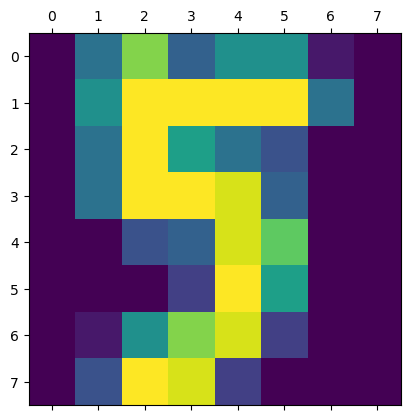

In [10]:
import matplotlib.pyplot as plt
plt.matshow(digits.images[33])
plt.show()

In [11]:
digits.target[33]

5

In [14]:
# reduce the dimension of 64 to 2
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
new_digits = pca.fit_transform(digits.data)

In [15]:
new_digits.shape

(1797, 2)

In [16]:
digits.data.shape #old Dimension

(1797, 64)

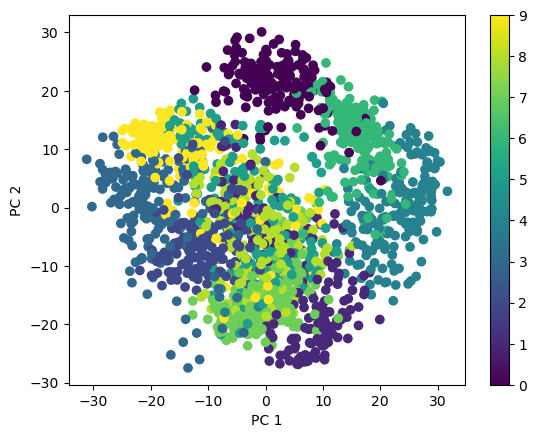

In [19]:
import matplotlib.pyplot as plt
plt.scatter(new_digits[:,0], new_digits[:,1], c=digits.target) # 'c = digits.target' divide into classes
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.colorbar()
plt.show()

In [20]:
#PCA for SPEEDUP models
from sklearn.datasets import load_digits
import numpy as np

In [21]:
digits = load_digits()

In [22]:
digits.data.shape

(1797, 64)

In [24]:
#feature scaling(preprocessing)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
new_data= sc.fit_transform(digits.data)

In [41]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
new_data_pca = pca.fit_transform(new_data)

In [42]:
new_data_pca.shape

(1797, 10)

In [43]:
#split the dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(new_data_pca, digits.target, test_size=0.2, random_state=42)

In [44]:
x_test.shape

(360, 10)

In [46]:
x_train.shape

(1437, 10)

In [47]:
#use Logistic Regression as the model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs',max_iter=1000)

import time
start = time.time()
model.fit(x_train, y_train)
end = time.time()

print((end-start)*1000) #time convert to ms

77.13627815246582


In [48]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(x_test)
accuracy_score(y_test, y_pred)

0.8916666666666667